In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('lending_club_ml.csv')
df.drop(['id'], inplace=True, axis=1)
df.info()

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506738 entries, 0 to 2506737
Data columns (total 100 columns):
loan_amnt                              float64
term                                   int64
int_rate                               float64
installment                            float64
grade                                  object
sub_grade                              object
emp_length                             int64
home_ownership                         object
annual_inc                             float64
verification_status                    object
loan_status                            int64
purpose                                object
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
mths_since_last_record                 float64
open

In [3]:
for thing in df:
    if df[thing].dtype == 'object':
        print(thing)

grade
sub_grade
home_ownership
verification_status
purpose
application_type
verification_status_joint
disbursement_method


In [4]:
# creating columns for features that had more than 2 outcomes
# I have decided to use subgrade and not grade as these are suppose to be similar features but, subgrade is more granular

df = pd.concat([df, pd.get_dummies(
    df.sub_grade, prefix='sub_grade', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.home_ownership,
                                   prefix='home_ownership', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.verification_status,
                                   prefix='verification_status', drop_first=True)], axis=1)
df = pd.concat(
    [df, pd.get_dummies(df.purpose, prefix='purpose', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.verification_status_joint,
                                   prefix='verification_status_joint', drop_first=True)], axis=1)

df.drop(columns=['sub_grade', 'home_ownership', 'verification_status',
                 'purpose', 'verification_status_joint', 'grade'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506738 entries, 0 to 2506737
Columns: 147 entries, loan_amnt to verification_status_joint_Verified
dtypes: float64(89), int64(3), object(2), uint8(53)
memory usage: 1.9+ GB


In [5]:
# conversions for features that only had 2 outcomes

df.disbursement_method = df.disbursement_method.apply(
    lambda disburstment: 1 if disburstment == 'Cash' else 0)

For the time being I have decided to drop grade in favor sub grade

I have decided to drop the split the data into two different sets: individual and the joint. I believe that these are fundamentally 2 different kinds of loans. In our EDA we saw that joint applicants had wide ranges in their FICO scores and in addition joint applicants are subjected to a second group of variables.

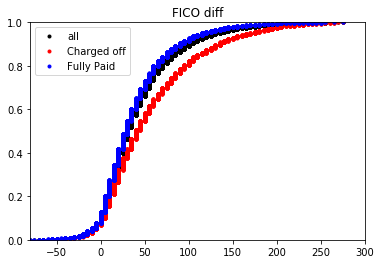

All Loans

count    23510.000000

mean        41.753977

std         44.937476

min        -80.000000

25%         10.000000

50%         30.000000

75%         60.000000

max        275.000000

Name: diff_fico_high, dtype: float64

Bad Loans (21%)

count    5032.000000

mean       56.096979

std        55.197095

min       -60.000000

25%        15.000000

50%        40.000000

75%        85.000000

max       275.000000

Name: diff_fico_high, dtype: float64


Passing Loans (78.59%)

count    18478.000000

mean        37.848036

std         40.846952

min        -80.000000

25%         10.000000

50%         30.000000

75%         55.000000

max        275.000000

Name: diff_fico_high, dtype: float64

In [6]:
df_i = df.loc[df.application_type == 'Individual']
df_j = df.loc[df.application_type != 'Individual']

df_i.drop(columns=['application_type'], inplace=True)
df_j.drop(columns=['application_type'], inplace=True)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
for thing in df_i:
    print(thing)

loan_amnt
term
int_rate
installment
emp_length
annual_inc
loan_status
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
collections_12_mths_ex_med
mths_since_last_major_derog
annual_inc_joint
dti_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
nu

In [8]:
for thing in df_i:
    if df_i[thing].isnull().values.any():
        print(thing)

inq_last_6mths
mths_since_last_delinq
mths_since_last_record
collections_12_mths_ex_med
mths_since_last_major_derog
annual_inc_joint
dti_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankruptcies
tax_liens
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
revol_bal_joint
sec_app_fico_range_l

I will drop all features associated with a secondary borrower and fill all the nans with the averages of their respective features.

In [9]:
for thing in df_i:
    if df_i[thing].isnull().values.any():
        df_i[thing].fillna(np.mean(df_i[thing]), inplace=True)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
# Dropping all joint and secondary linked features

df_i.drop(columns=['sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
                   'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                   'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'dti_joint', 'sec_app_open_act_il',
                   'revol_bal_joint', 'annual_inc_joint'], inplace=True)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470188 entries, 0 to 2506736
Columns: 132 entries, loan_amnt to verification_status_joint_Verified
dtypes: float64(75), int64(4), uint8(53)
memory usage: 1.6 GB


ML for regular loans

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def scoring(clf, x, y):
    
    print('Loan passing rate:',np.mean(y))
#    print('Loan passing rate:',np.average(y,x['loan_amnt']))
    
    print('score: ', '{:>10}'.format(str(clf.score(x, y))))
    
    #score adjusted for loan amount
    print('balanced_accuracy_score: ', '{:>10}'.format(
        balanced_accuracy_score(y, clf.predict(x), sample_weight=x['loan_amnt'])))

    print(confusion_matrix(y, clf.predict(x)))
    print('F1 score: ', '{:>10}'.format(
        str(f1_score(y, clf.predict(x)))))
    print('precision_score: ', '{:>10}'.format(
        str(precision_score(y, clf.predict(x)))))
    
    #score adjusted for loan amount
    print('average_precision_score: ', '{:>10}'.format(average_precision_score(
        y, clf.predict(x), average='weighted', sample_weight=x['loan_amnt'])))
    print('recall_score: ', '{:>10}'.format(
        str(recall_score(y, clf.predict(x)))))
    clf.predict_proba(x)
    
    #score adjusted for loan amount
    print('roc: ', '{:>10}'.format(
        str(roc_auc_score(y, clf.predict_proba(x)[:, 1], average='weighted', sample_weight=x['loan_amnt']))))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


def ML(dataframe):
    X = dataframe.drop(['loan_status'], axis=1)
    y = dataframe.loan_status

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    gbm = GradientBoostingClassifier()
    gbm.fit(X_train, y_train)
    print('\n')
    print('GRADIENT BOOSTING')
    scoring(gbm, X_test, y_test)

    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    print('\n')
    print('DECISION TREE')
    scoring(dtc, X_test, y_test)    
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print('\n')
    print('RANDOM FOREST')
    scoring(rf, X_test, y_test)

In [14]:
ML(df_i)



GRADIENT BOOSTING
Loan passing rate: 0.8018762389397847
score:  0.8062753607347343
balanced_accuracy_score:  0.5385905627895482
[[ 11834 134987]
 [  8574 585662]]
F1 score:  0.890818588697871
precision_score:  0.812686897504888
average_precision_score:  0.7998449742142856
recall_score:  0.9855713891450535
roc:  0.7287816303900644


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.8018762389397847
score:  0.9283347974582252
balanced_accuracy_score:  0.8592436174282925
[[108149  38672]
 [ 14436 579800]]
F1 score:  0.9562071001428208
precision_score:  0.9374717044587305
average_precision_score:  0.9298384999346954
recall_score:  0.9757066216116156
roc:  0.9366606511798172


ML for joint loans

In [15]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36550 entries, 448539 to 2506737
Columns: 146 entries, loan_amnt to verification_status_joint_Verified
dtypes: float64(89), int64(4), uint8(53)
memory usage: 28.1 MB


In [16]:
for thing in df_j:
    if df_j[thing].isnull().values.any():
        df_j[thing].fillna(np.mean(df_j[thing]), inplace=True)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
Xj = df_j.drop(['loan_status'], axis=1)
yj = df_j.loan_status

Xj_train, Xj_test, yj_train, yj_test = train_test_split(
    Xj, yj, test_size=0.3, random_state=42)

In [18]:
ML(df_j)



GRADIENT BOOSTING
Loan passing rate: 0.7680802553579571
score:  0.7836753305973552
balanced_accuracy_score:  0.5607837806709302
[[ 417 2126]
 [ 246 8176]]
F1 score:  0.8733176671651357
precision_score:  0.7936323044069112
average_precision_score:  0.7860172587107791
recall_score:  0.9707907860365709
roc:  0.745654959071334


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.7680802553579571
score:  0.9144550843593251
balanced_accuracy_score:  0.8447167063397092
[[1864  679]
 [ 259 8163]]
F1 score:  0.9456672845227062
precision_score:  0.9232074191359421
average_precision_score:  0.9131492936231532
recall_score:  0.96924720968891
roc:  0.9288723137110362


So the scores were pretty similar for both class of loans. Although it was slightly lower for joint loans. Unfortunately logistic regression seems to be a horrible classifier. Not only does it have the lowest score it also predicted that 6 loans were bad and out of that 3 were actually good! 

ALL TOGETHER NOW, ML for the whole data set

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506738 entries, 0 to 2506737
Columns: 147 entries, loan_amnt to verification_status_joint_Verified
dtypes: float64(89), int64(4), object(1), uint8(53)
memory usage: 1.9+ GB


In [20]:
df.application_type = df.application_type.apply(
    lambda app_type: 1 if app_type == 'Individual' else 0)

In [21]:
sec_list = ['sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
            'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
            'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'sec_app_open_act_il']
joint_list = ['dti_joint', 'revol_bal_joint', 'annual_inc_joint']

for secondary in sec_list:
    df.loc[df.application_type ==
           1][secondary] = df.loc[df.application_type == 1][secondary[8:]]

for joint in joint_list:
    df.loc[df.application_type ==
           1][joint] = df.loc[df.application_type == 1][joint[:len(joint)-6]]

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [22]:
for thing in df:
    if df[thing].isnull().values.any():
        df[thing].fillna(np.mean(df[thing]), inplace=True)

In [23]:
ML(df)



GRADIENT BOOSTING
Loan passing rate: 0.8009672589365736
score:  0.8049046437471244
balanced_accuracy_score:  0.5357708792945135
[[ 11431 138246]
 [  8470 593875]]
F1 score:  0.8900563970906715
precision_score:  0.8111705578722643
average_precision_score:  0.7978289768315372
recall_score:  0.9859382911786435
roc:  0.7280044097447846


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.8009672589365736
score:  0.9287095324338915
balanced_accuracy_score:  0.8599965133060247
[[110750  38927]
 [ 14685 587660]]
F1 score:  0.9563751289737756
precision_score:  0.9378745489453181
average_precision_score:  0.9297767591104906
recall_score:  0.9756202840564793
roc:  0.9374429219746793


Scores from highest to lowest: individual, all, then joint. I wouldn't exactly say this is is a fair comparison since we used different fill nan values, different set of features, and had different sample sizes. Although generally speaking joint loans seem harder to classify. This may have brought down scores for ml_all. 

We are going to try and see if we can get better scores among each grade of loans.

In [24]:
df = pd.read_csv('lending_club_ml.csv')
df.drop(['id'], inplace=True, axis=1)
df.info()

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506738 entries, 0 to 2506737
Data columns (total 100 columns):
loan_amnt                              float64
term                                   int64
int_rate                               float64
installment                            float64
grade                                  object
sub_grade                              object
emp_length                             int64
home_ownership                         object
annual_inc                             float64
verification_status                    object
loan_status                            int64
purpose                                object
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
mths_since_last_record                 float64
open

In [25]:
df.disbursement_method = df.disbursement_method.apply(
    lambda disburstment: 1 if disburstment == 'Cash' else 0)
df.application_type = df.application_type.apply(
    lambda app_type: 1 if app_type == 'Individual' else 0)

In [26]:
sec_list = ['sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
            'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
            'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'sec_app_open_act_il']
joint_list = ['dti_joint', 'revol_bal_joint', 'annual_inc_joint']

for secondary in sec_list:
    df.loc[df.application_type ==
             1][secondary] = df.loc[df.application_type == 1][secondary[8:]]

for joint in joint_list:
    df.loc[df.application_type ==
             1][joint] = df.loc[df.application_type == 1][joint[:len(joint)-6]]

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [27]:
df = pd.concat([df, pd.get_dummies(
    df.sub_grade, prefix='sub_grade', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.home_ownership,
                                   prefix='home_ownership', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.verification_status,
                                   prefix='verification_status', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.purpose, prefix='purpose', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.verification_status_joint,
                                   prefix='verification_status_joint', drop_first=True)], axis=1)

df.drop(columns=['sub_grade', 'home_ownership', 'verification_status',
                 'purpose', 'verification_status_joint'], inplace=True)

In [28]:
def grade_df(dataframe_grade):
    for thing in dataframe_grade:
        if dataframe_grade[thing].isnull().values.any():
            dataframe_grade[thing].fillna(np.mean(dataframe_grade[thing]), inplace=True)
    
    dataframe_grade.drop(columns=['grade'],inplace=True)
    
    return dataframe_grade

In [29]:
df_a = grade_df(df.loc[df.grade == 'A'])
ML(df_a)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.9405104807551982
score:  0.9405335238226913
balanced_accuracy_score:  0.5006022180669367
[[    13   7732]
 [    10 122436]]
F1 score:  0.9693524507746998
precision_score:  0.9405998402065023
average_precision_score:  0.9414604966418046
recall_score:  0.9999183313460628
roc:  0.6768820339839337


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.9405104807551982
score:  0.9788618260862886
balanced_accuracy_score:  0.8244226427589971
[[  5077   2668]
 [    84 122362]]
F1 score:  0.9888797297515719
precision_score:  0.9786611213308806
average_precision_score:  0.978607688360896
recall_score:  0.9993139833069271
roc:  0.8978230783212322


In [30]:
df_b = grade_df(df.loc[df.grade == 'B'])

ML(df_b)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.8673473571985074
score:  0.8673701380061326
balanced_accuracy_score:  0.5002613865509615
[[    21  29094]
 [    16 190352]]
F1 score:  0.9289677756250395
precision_score:  0.8674206866381706
average_precision_score:  0.8651264801534112
recall_score:  0.9999159522608841
roc:  0.6477998626699679


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.8673473571985074
score:  0.9510531567365126
balanced_accuracy_score:  0.8333525338380567
[[ 19550   9565]
 [  1178 189190]]
F1 score:  0.9723917630158073
precision_score:  0.9518754245176222
average_precision_score:  0.9506354932217147
recall_score:  0.993811985207598
roc:  0.9116751331947567


In [31]:
df_c = grade_df(df.loc[df.grade == 'C'])

ML(df_c)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.7772935382135309
score:  0.7777715295253359
balanced_accuracy_score:  0.5019134234359683
[[   203  47321]
 [   101 165768]]
F1 score:  0.8748621219238015
precision_score:  0.7779284712021738
average_precision_score:  0.7703780937644878
recall_score:  0.9993910857363341
roc:  0.640479672178083


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.7772935382135309
score:  0.9168904322072421
balanced_accuracy_score:  0.847550215507977
[[ 34225  13299]
 [  4436 161433]]
F1 score:  0.9479302761882672
precision_score:  0.9238891559645629
average_precision_score:  0.9172325559312757
recall_score:  0.9732560032314658
roc:  0.924580798533717


In [32]:
df_d = grade_df(df.loc[df.grade == 'D'])

ML(df_d)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.6985549107182656
score:  0.7040196838811479
balanced_accuracy_score:  0.5198508815674399
[[ 1862 31952]
 [ 1249 77110]]
F1 score:  0.8228533622166139
precision_score:  0.7070290293594469
average_precision_score:  0.6930057348284491
recall_score:  0.9840605418650059
roc:  0.6418442835618936


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.6985549107182656
score:  0.8888056840772735
balanced_accuracy_score:  0.8526563985702642
[[25738  8076]
 [ 4397 73962]]
F1 score:  0.9222367001876594
precision_score:  0.90155781467125
average_precision_score:  0.884048895462644
recall_score:  0.943886471241338
roc:  0.9302353580105257


In [33]:
df_e = grade_df(df.loc[df.grade == 'E'])

ML(df_e)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.6156433188035473
score:  0.6433563805801894
balanced_accuracy_score:  0.5605930249050125
[[ 4500 15957]
 [ 3025 29742]]
F1 score:  0.7580863048963883
precision_score:  0.6508238692312742
average_precision_score:  0.6349311264520161
recall_score:  0.9076815088351085
roc:  0.6438244119618596


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.6156433188035473
score:  0.8641590260033067
balanced_accuracy_score:  0.8537752078158646
[[16699  3758]
 [ 3472 29295]]
F1 score:  0.8901549680948039
precision_score:  0.8863038150848637
average_precision_score:  0.8509668538054272
recall_score:  0.8940397350993378
roc:  0.930754515514484


In [34]:
df_f = grade_df(df.loc[df.grade == 'F'])

ML(df_f)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.549331012727075
score:  0.6156314587185903
balanced_accuracy_score:  0.5952898993433103
[[3635 4651]
 [2416 7684]]
F1 score:  0.6850011143302875
precision_score:  0.6229428455614107
average_precision_score:  0.5915407230734055
recall_score:  0.7607920792079208
roc:  0.6512012744321308


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.549331012727075
score:  0.8630479712824976
balanced_accuracy_score:  0.8600308832011903
[[7276 1010]
 [1508 8592]]
F1 score:  0.8721957161709472
precision_score:  0.8948135805040617
average_precision_score:  0.8338427639321693
recall_score:  0.8506930693069307
roc:  0.9357859887790684


In [35]:
df_g = grade_df(df.loc[df.grade == 'G'])

ML(df_g)

C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\leero\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)




GRADIENT BOOSTING
Loan passing rate: 0.49284885968303055
score:  0.6231155778894473
balanced_accuracy_score:  0.6278337777218
[[1637  987]
 [ 963 1587]]
F1 score:  0.6194379391100703
precision_score:  0.6165501165501166
average_precision_score:  0.5751170641941389
recall_score:  0.6223529411764706
roc:  0.679622435591048


C:\Users\leero\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




RANDOM FOREST
Loan passing rate: 0.49284885968303055
score:  0.8419018167761886
balanced_accuracy_score:  0.8422274272905619
[[2300  324]
 [ 494 2056]]
F1 score:  0.8340770791075052
precision_score:  0.8638655462184874
average_precision_score:  0.7927106947296002
recall_score:  0.8062745098039216
roc:  0.9220783994513891


Interestingly the scores are hurt as we look at the lower grades. However the scores are still higher than the loan passing rate

Going to run these 

In [13]:
from sklearn.naive_bayes import GaussianNB
#var_smoothing : float, optional (default=1e-9)
gaussian_nb = GaussianNB()

X = df_i.drop(['loan_status'], axis=1)
y = df_i.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gaussian_nb.fit(X_train, y_train)

scoring(gaussian_nb, X_test, y_test)


Loan passing rate: 0.8018762389397847
score:  0.44620859124196927
balanced_accuracy_score:  0.591571043555728
[[119184  27637]
 [382754 211482]]
F1 score:  0.5075436038662995
precision_score:  0.8844215641584315
average_precision_score:  0.8207192214814045
recall_score:  0.3558889060911826
roc:  0.659946435989192


In [37]:
from sklearn.naive_bayes import BernoulliNB
#alpha : float, optional (default=1.0)
bernoulli_nb = BernoulliNB()

X = df_i.drop(['loan_status'], axis=1)
y = df_i.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bernoulli_nb.fit(X_train, y_train)

scoring(bernoulli_nb, X_test, y_test)

Loan passing rate: 0.8018762389397847
score:  0.7939713139475101
balanced_accuracy_score:  0.5458201603019825
[[ 18890 127931]
 [ 24748 569488]]
F1 score:  0.8817958355752891
precision_score:  0.816565077808319
average_precision_score:  0.80237121366482
recall_score:  0.9583532468581506
roc:  0.6910071057041772


In [14]:
from sklearn.model_selection import GridSearchCV

def hypertune(clf,param,x,y):
    clf_cv = GridSearchCV(clf,parameters, cv=5)
    clf.fit(x,y)

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {'var_smoothing':[np.logspace(np.log10(.000000001),np.log10(10000),5)]}

grid_gaussian_nb = GridSearchCV(gaussian_nb,parameters, cv=5)

grid_gaussian_nb.fit(df_i.drop(columns=['loan_status']),df_i['loan_status'])

sorted(grid_gaussian_nb.cv_results_.keys())

C:\Users\leero\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: operands could not be broadcast together with shapes (2,131) (5,) (2,131) 

In [16]:
grid_gaussian_nb.score(df_i.drop(columns=['loan_status']),df_i['loan_status'])

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
grid_gaussian_nb.cv_results_